In this case Study i am doing Exploratory data analytics

**Problem Statement**

---



When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1.If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.

2.If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.



In [ ]:
##Firstly to start the assignment we need to upload all the specific libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
%matplotlib inline

In [ ]:
##Sometime python shows error when plotting graph we should write the code to ignore the warnings

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
##Loading The application_data and previous_application File

In [ ]:
df_application = pd.read_csv("/content/drive/MyDrive/application_data.csv")
df_previous = pd.read_csv("/content/drive/MyDrive/previous_application.csv")

In [ ]:
##checking the data structure for application_data and previous_application seperately 


In [ ]:
df_application.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [ ]:
df_previous.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
## To find number of rows and columns in application_data data
df_application.shape

(307511, 122)

In [ ]:
## To find number of rows and columns in previous_application data
df_previous.shape

(1670214, 37)

In [ ]:
##To find total number of elements present in Data
df_application.size

37516342

In [ ]:
##To find total number of elements present in Data
df_previous.size

61797918

In [ ]:
##To find some Statostical Data
df_application.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [ ]:
##To find some Statostical Data
df_previous.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

In [ ]:
##finding missing values application_data
print(df_application.isnull().sum())

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


In [ ]:
##finding missing values in previous_application
print(df_previous.isnull().sum())

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [ ]:
##percentage of null value in every column
null_per = df_application.isnull().sum()/len(df_application)*100
null_per.head(50)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                    65.990810
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

In [ ]:
##percentage of null value in every column
null_per = df_previous.isnull().sum()/len(df_application)*100
null_per.head(50)

SK_ID_PREV                       0.000000
SK_ID_CURR                       0.000000
NAME_CONTRACT_TYPE               0.000000
AMT_ANNUITY                    121.047702
AMT_APPLICATION                  0.000000
AMT_CREDIT                       0.000325
AMT_DOWN_PAYMENT               291.320961
AMT_GOODS_PRICE                125.366247
WEEKDAY_APPR_PROCESS_START       0.000000
HOUR_APPR_PROCESS_START          0.000000
FLAG_LAST_APPL_PER_CONTRACT      0.000000
NFLAG_LAST_APPL_IN_DAY           0.000000
RATE_DOWN_PAYMENT              291.320961
RATE_INTEREST_PRIMARY          541.204380
RATE_INTEREST_PRIVILEGED       541.204380
NAME_CASH_LOAN_PURPOSE           0.000000
NAME_CONTRACT_STATUS             0.000000
DAYS_DECISION                    0.000000
NAME_PAYMENT_TYPE                0.000000
CODE_REJECT_REASON               0.000000
NAME_TYPE_SUITE                266.788830
NAME_CLIENT_TYPE                 0.000000
NAME_GOODS_CATEGORY              0.000000
NAME_PORTFOLIO                   0

In [ ]:
null_col = df_application.isnull().sum()/len(df_application)*100
null_col.sort_values(ascending = False).head(25)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
FLOORSMIN_AVG               67.848630
FLOORSMIN_MODE              67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_AVG             66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MEDI               59.376738
LANDAREA_MODE               59.376738
LANDAREA_AVG                59.376738
BASEMENTAREA_MEDI           58.515956
BASEMENTAREA_AVG            58.515956
BASEMENTAREA_MODE           58.515956
EXT_SOURCE_1                56.381073
NONLIVINGAREA_MODE          55.179164
dtype: float64

In [ ]:
null_col2 = df_previous.isnull().sum()/len(df_previous)*100
null_col2.sort_values(ascending = False).head(25)

RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
NAME_YIELD_GROUP              0.000000
NAME_PORTFOLIO                0.000000
NAME_SELLER_INDUSTRY          0.000000
SELLERPLACE_AREA              0.000000
CHANNEL_TYPE                  0.000000
NAME_PRODUCT_TYPE             0.000000
SK_ID_PREV                    0.000000
NAME_GOODS_CATEGORY           0.000000
NAME_CLIENT_TYPE              0.000000
dtype: float64

Deleting Column

In [ ]:
##Removing all the column which have high null value
df_application= df_application.loc[:, 100*df_application.isnull().sum()/len(df_application) < 50]
df_application.shape

(307511, 81)

Earlier the value is (307511, 122) but now we have dropped column which contain null value more than 50%

In [ ]:
##Removing all the column which have high null value
df_previous= df_previous.loc[:, 100*df_previous.isnull().sum()/len(df_previous) < 50]
df_previous.shape

(1670214, 33)

Earlier the value is (1670214, 37) but now we have dropped column which contain null value more than 50%

In [ ]:
##Merging application_data and previous_application to make a combine file and Analyse
df = pd.merge(left = df_application, right = df_previous, how = 'left', left_on = 'SK_ID_CURR', right_on = 'SK_ID_CURR')
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  ...  NAME_SELLER_INDUSTRY CNT_PAYMENT NAME_YIELD_GROUP  \
0        24700.5  ...       Auto technology        24.0       low_normal   
1        35698.5  ...                   XNA        12.0       low_normal   
2        35698.5  ...             Furniture         6.0           middle   
3        35698.5  ...  Consumer electronics        12.0           middle   
4         6750.0  ...          Connectivity         4.0           middle   

           PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0      POS other with interest           365243.0         -565.0   
1             Cash X-Sell: low           365243.0         -716.0   
2   POS industry with interest           365243.0         -797.0   
3  POS household with interest           365243.0        -2310.0   
4  POS mobile without interest           365243.0         -784.0   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                      125.0          -25.0             -17.0   
1                     -386.0         -536.0            -527.0   
2                     -647.0         -647.0            -639.0   
3                    -1980.0        -1980.0           -1976.0   
4                     -694.0         -724.0            -714.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        0.0  
3                        1.0  
4                        0.0  

[5 rows x 113 columns]

**Errors in Data type and Data**

---



**Conversion of Negative Data into Positive Data using Absolute Function**

---



In [ ]:
##Checking the values present in Column which contain days
ad_col = [col for col in df_application if col.startswith('DAYS')]
ad_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [ ]:
print(df['DAYS_BIRTH'].unique())
print(df['DAYS_EMPLOYED'].unique())
print(df['DAYS_REGISTRATION'].unique())
print(df['DAYS_ID_PUBLISH'].unique())
print(df['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [ ]:
##converting the negative data into positive
df[ad_col] = abs(df[ad_col])
df[ad_col].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0        9461            637             3648.0             2120   
1       16765           1188             1186.0              291   
2       16765           1188             1186.0              291   
3       16765           1188             1186.0              291   
4       19046            225             4260.0             2531   

   DAYS_LAST_PHONE_CHANGE  
0                  1134.0  
1                   828.0  
2                   828.0  
3                   828.0  
4                   815.0

In [ ]:
print(df['DAYS_BIRTH'].unique())
print(df['DAYS_EMPLOYED'].unique())
print(df['DAYS_REGISTRATION'].unique())
print(df['DAYS_ID_PUBLISH'].unique())
print(df['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


In [ ]:
df.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  1.430155e+06  1.430155e+06  1.430155e+06      1.430155e+06   
mean   2.784702e+05  8.624240e-02  4.038870e-01      1.736036e+05   
std    1.028021e+05  2.807218e-01  7.165176e-01      1.983303e+05   
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e+04   
25%    1.893610e+05  0.000000e+00  0.000000e+00      1.125000e+05   
50%    2.789560e+05  0.000000e+00  0.000000e+00      1.575000e+05   
75%    3.675090e+05  0.000000e+00  1.000000e+00      2.115000e+05   
max    4.562550e+05  1.000000e+00  1.900000e+01      1.170000e+08   

       AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
count  1.430155e+06   1.430062e+06       1.428936e+06   
mean   5.893386e+05   2.704203e+04       5.294435e+05   
std    3.874204e+05   1.404002e+04       3.557882e+05   
min    4.500000e+04   1.615500e+03       4.050000e+04   
25%    2.700000e+05   1.679850e+04       2.385000e+05   
50%    5.084955e+05   2.491650e+04       4.500000e+05   
75%    8.086500e+05   3.457350e+04       6.795000e+05   
max    4.050000e+06   2.580255e+05       4.050000e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count                1.430155e+06  1.430155e+06   1.430155e+06  ...   
mean                 2.079102e-02  1.631495e+04   7.255951e+04  ...   
std                  1.339810e-02  4.346737e+03   1.432601e+05  ...   
min                  2.900000e-04  7.489000e+03   0.000000e+00  ...   
25%                  1.003200e-02  1.272950e+04   1.036000e+03  ...   
50%                  1.885000e-02  1.603700e+04   2.395000e+03  ...   
75%                  2.866300e-02  1.997500e+04   6.301000e+03  ...   
max                  7.250800e-02  2.522900e+04   3.652430e+05  ...   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  \
count            1.413701e+06   1.413701e+06      1.413701e+06  1.106488e+06   
mean             9.964321e-01  -8.803670e+02      3.149878e+02  1.605194e+01   
std              5.962560e-02   7.835402e+02      7.695082e+03  1.456675e+01   
min              0.000000e+00  -2.922000e+03     -1.000000e+00  0.000000e+00   
25%              1.000000e+00  -1.313000e+03     -1.000000e+00  6.000000e+00   
50%              1.000000e+00  -5.820000e+02      4.000000e+00  1.200000e+01   
75%              1.000000e+00  -2.710000e+02      8.500000e+01  2.400000e+01   
max              1.000000e+00  -1.000000e+00      4.000000e+06  8.400000e+01   

       DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count       852595.000000   852595.000000              852595.000000   
mean        342257.656710    13488.741567               33274.831806   
std          88832.266598    71650.147146              106161.775933   
min          -2922.000000    -2892.000000               -2801.000000   
25%         365243.000000    -1630.000000               -1244.000000   
50%         365243.000000     -825.000000                -358.000000   
75%         365243.000000     -408.000000                 135.000000   
max         365243.000000   365243.000000              365243.000000   

       DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count  852595.000000     852595.000000              852595.000000  
mean    76665.634755      82353.171672                   0.330572  
std    149704.716371     153537.064274                   0.470419  
min     -2889.000000      -2874.000000                   0.000000  
25%     -1316.000000      -1269.000000                   0.000000  
50%      -534.000000       -494.000000                   0.000000  
75%       -73.000000        -42.000000                   1.000000  
max    365243.000000     365243.000000                   1.000000  

[8 rows x 84 columns]

In [ ]:
##Finding the Gender Distribution in data set
df.CODE_GENDER.value_counts()

F      964822
M      465278
XNA        55
Name: CODE_GENDER, dtype: int64

Imputing the value 'XNA' which means not available for column 'CODE_GENDER'

In [ ]:
df.loc[df.CODE_GENDER=='XNA','CODE_GENDER']= 'M'
df.CODE_GENDER.value_counts()

F    964822
M    465333
Name: CODE_GENDER, dtype: int64

Imputing the value 'XNA' which means not available for column 'ORGANIZATION_TYPE'

In [ ]:
df=df_application.replace('XNA',np.NaN)
df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

Binning of continous variables

In [ ]:
df['AMT_INCOME_RANGE'] = pd.qcut(df.AMT_INCOME_TOTAL,q =[0,0.25,0.5,0.75,1], labels = ['VERY_LOW','LOW','MEDIUM','HIGH'])
df['AMT_INCOME_RANGE'].head(21)

0       MEDIUM
1         HIGH
2     VERY_LOW
3          LOW
4          LOW
5     VERY_LOW
6       MEDIUM
7         HIGH
8     VERY_LOW
9          LOW
10    VERY_LOW
11    VERY_LOW
12    VERY_LOW
13        HIGH
14      MEDIUM
15      MEDIUM
16    VERY_LOW
17    VERY_LOW
18    VERY_LOW
19    VERY_LOW
20         LOW
Name: AMT_INCOME_RANGE, dtype: category
Categories (4, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH']

In [ ]:
df['DAYS_BIRTH']= abs(df_application['DAYS_BIRTH']//365).astype(int)
df['DAYS_BIRTH'].unique()

array([26, 46, 53, 55, 47, 38, 52, 56, 40, 28, 37, 39, 24, 36, 27, 49, 32,
       51, 41, 31, 69, 44, 29, 42, 33, 34, 48, 58, 66, 45, 65, 22, 60, 50,
       57, 63, 54, 43, 30, 68, 64, 62, 59, 61, 35, 23, 25, 67, 70, 21])

**Analysis**

---



Finding outliers

In [ ]:
fig = px.box(df, y="AMT_INCOME_TOTAL", title='Distribution of AMT_INCOME_Total')
fig.show()

Outlier is data/objects that deviates significantly from  rest of the objects. here we can see in graph 'AMT_INCOME_TOTAL' 117M is an Outlier

In [ ]:
plt_birth = px.box(df, y = 'DAYS_BIRTH', title = 'DAYS_BIRTH')
plt_birth.show()

Here in the graph 'DAYS_BIRTH' we dont find any outlier

In [ ]:
plt_box = px.box(df, y = 'AMT_ANNUITY', title = 'AMT_ANNUITY')
plt_box.show()

Here we can see that in graph 'AMT_ANNUITY' we observe that there is a value of 258.0255k is an outlier

In [ ]:
df['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

AttributeError: ignored

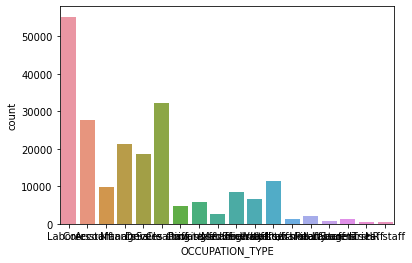

In [ ]:
sns.countplot(x = 'OCCUPATION_TYPE', data = df)
plt.xticks.format(rotation = 90)
plt.show()

In [ ]:
df['TARGET'].value_counts(normalize  = True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [ ]:
df['TARGET'].value_counts(normalize  = True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

Dividing the data set into two different data set based upon 'Target' value.

In [ ]:
df_1 = df.loc[df['TARGET']==1]
df_0 = df.loc[df['TARGET']==0]

Text(0.5, 1.0, 'Target Imbalance Distribution')

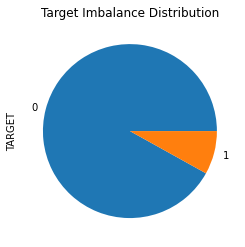

In [ ]:
count_class = pd.value_counts(df['TARGET'], sort = True)
count_class.plot(kind = 'pie', rot = 2)
plt.title('Target Imbalance Distribution' )

In [ ]:
round(len(df_0)/len(df_1),2)

11.39

**Univariate Analysis**

---



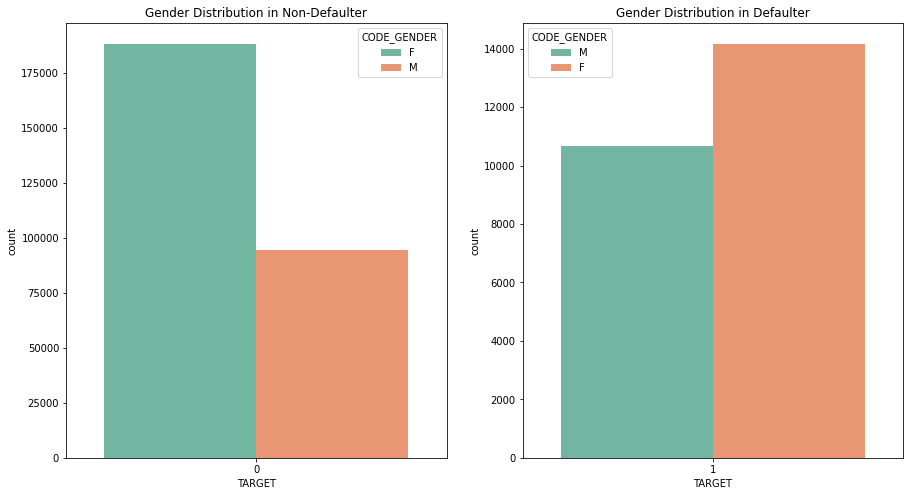

In [ ]:
plt.figure(figsize = (15,8))
plt.subplot(121)
sns.countplot(x = 'TARGET', hue = 'CODE_GENDER', data = df_0, palette = 'Set2')
plt.title("Gender Distribution in Non-Defaulter")
plt.subplot(122)
sns.countplot(x = 'TARGET', hue = 'CODE_GENDER', data = df_1, palette = 'Set2')
plt.title("Gender Distribution in Defaulter")
plt.show()

In both the charts female had applier higher then the male clients for loan


In [ ]:
def uni(col):
  sns.set(style="darkgrid")
  plt.figure(figsize = (30,10))

  plt.subplot(1,2,1)
  sns.distplot(df_0[col], color = "green")
  plt.yscale('linear')
  plt.xlabel(col, fontsize = 25, fontweight = "bold")
  plt.ylabel('Non Payment Difficulties', fontsize= 30, fontweight="bold") 
  plt.xticks(rotation = 90, fontsize = 30)
  plt.yticks(rotation = 360, fontsize = 30)

  plt.subplot(1,2,2)
  sns.distplot(df_1[col], color = "red")
  plt.yscale('linear')
  plt.xlabel(col, fontsize = 25, fontweight = "bold")
  plt.ylabel('Payment Difficulties', fontsize= 30, fontweight="bold") 
  plt.xticks(rotation = 90, fontsize = 30)
  plt.yticks(rotation = 360, fontsize = 30)
  plt.show()

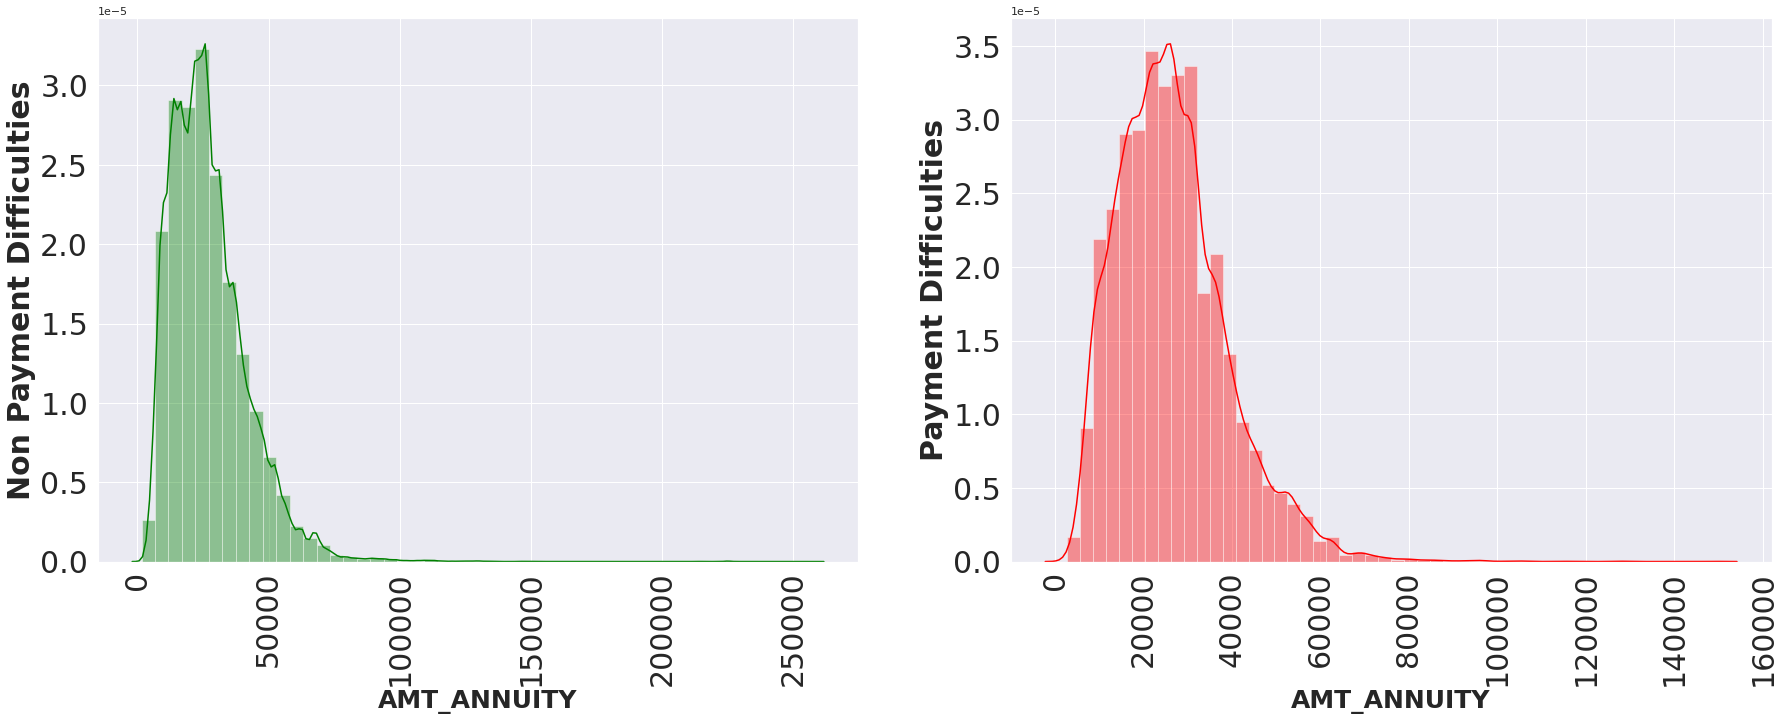

In [ ]:
uni(col = 'AMT_ANNUITY')

credit amount based on target 0 and target 1

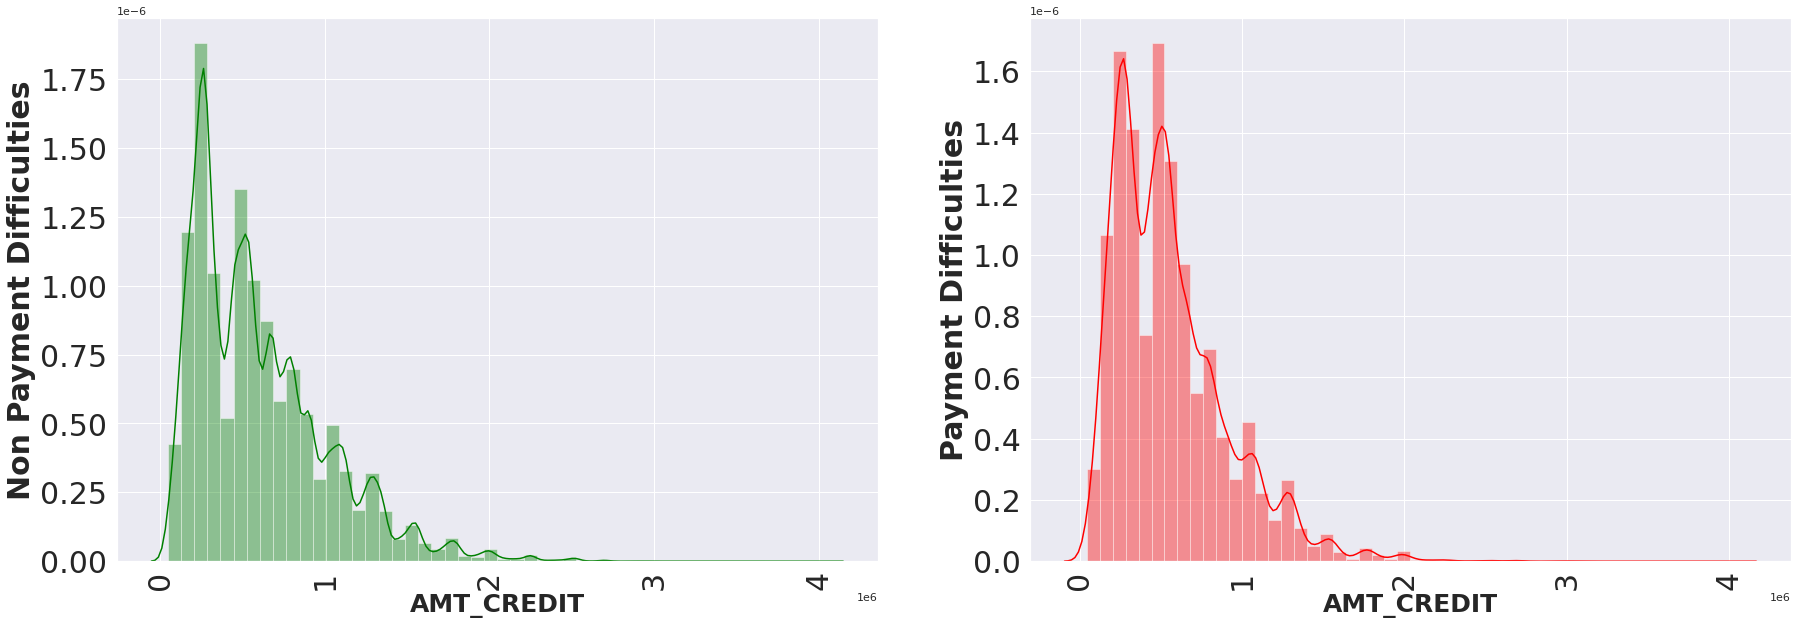

In [ ]:
uni(col = 'AMT_CREDIT')

price of goods based on target 0 and target 1

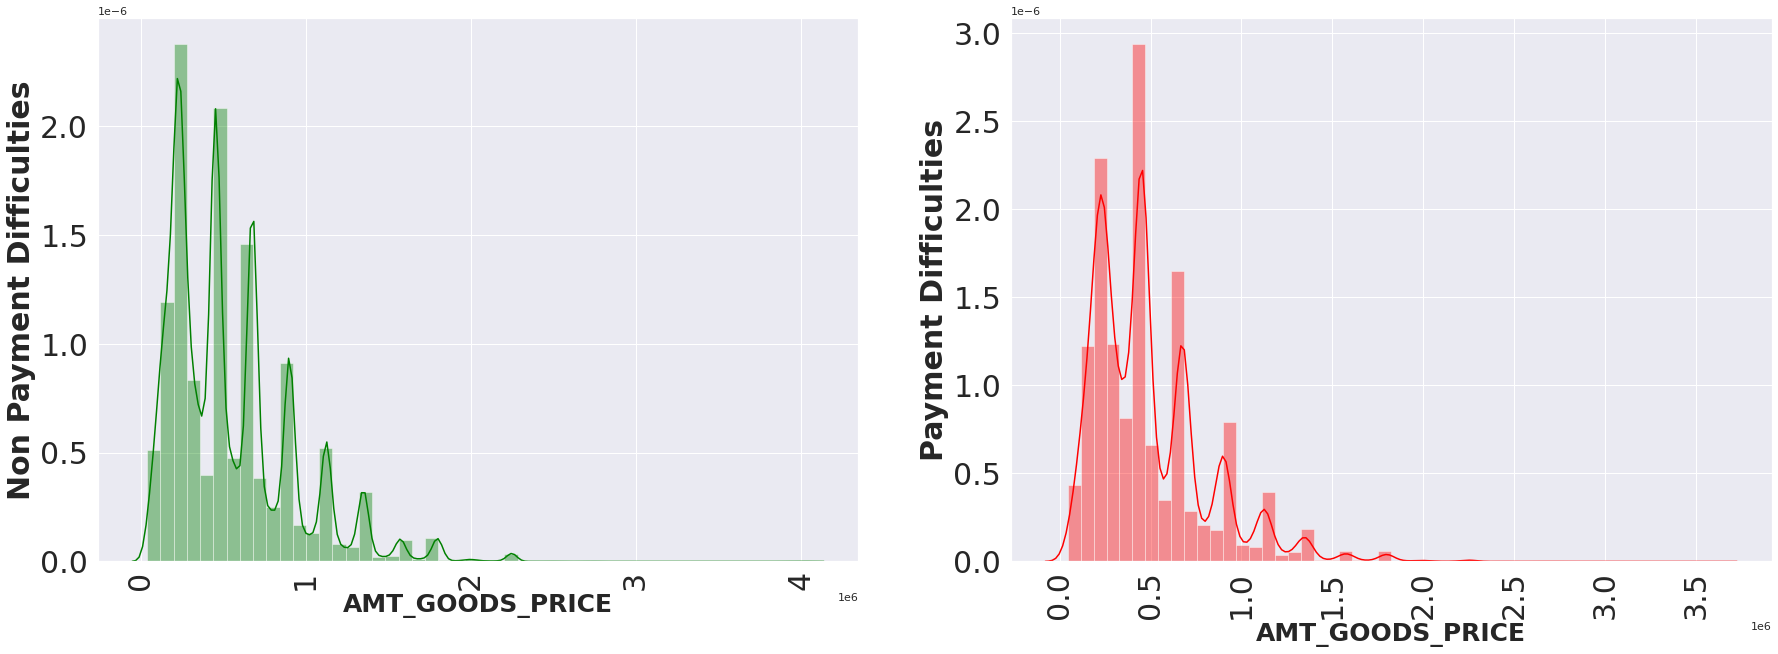

In [ ]:
uni(col = 'AMT_GOODS_PRICE')

Dist. plot highlights the curve shape which is wider for df_1 in comparison to df_0

people with df_1 had largely staggered income as compare to df_0

**Bivariate Analysis**

---



In [ ]:
df_1[['TARGET', 'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS']]

TARGET  AMT_INCOME_TOTAL            NAME_EDUCATION_TYPE  \
0            1          202500.0  Secondary / secondary special   
26           1          112500.0  Secondary / secondary special   
40           1          202500.0  Secondary / secondary special   
42           1          135000.0  Secondary / secondary special   
81           1           81000.0  Secondary / secondary special   
...        ...               ...                            ...   
307448       1          207000.0  Secondary / secondary special   
307475       1          144000.0               Higher education   
307481       1          225000.0  Secondary / secondary special   
307489       1          225000.0  Secondary / secondary special   
307509       1          171000.0  Secondary / secondary special   

          NAME_FAMILY_STATUS  
0       Single / not married  
26                     Widow  
40                   Married  
42            Civil marriage  
81                   Married  
...                      ...  
307448               Married  
307475        Civil marriage  
307481               Married  
307489        Civil marriage  
307509               Married  

[24825 rows x 4 columns]

Income amount Vs Education Status Vs family status For target Non-Defaulter

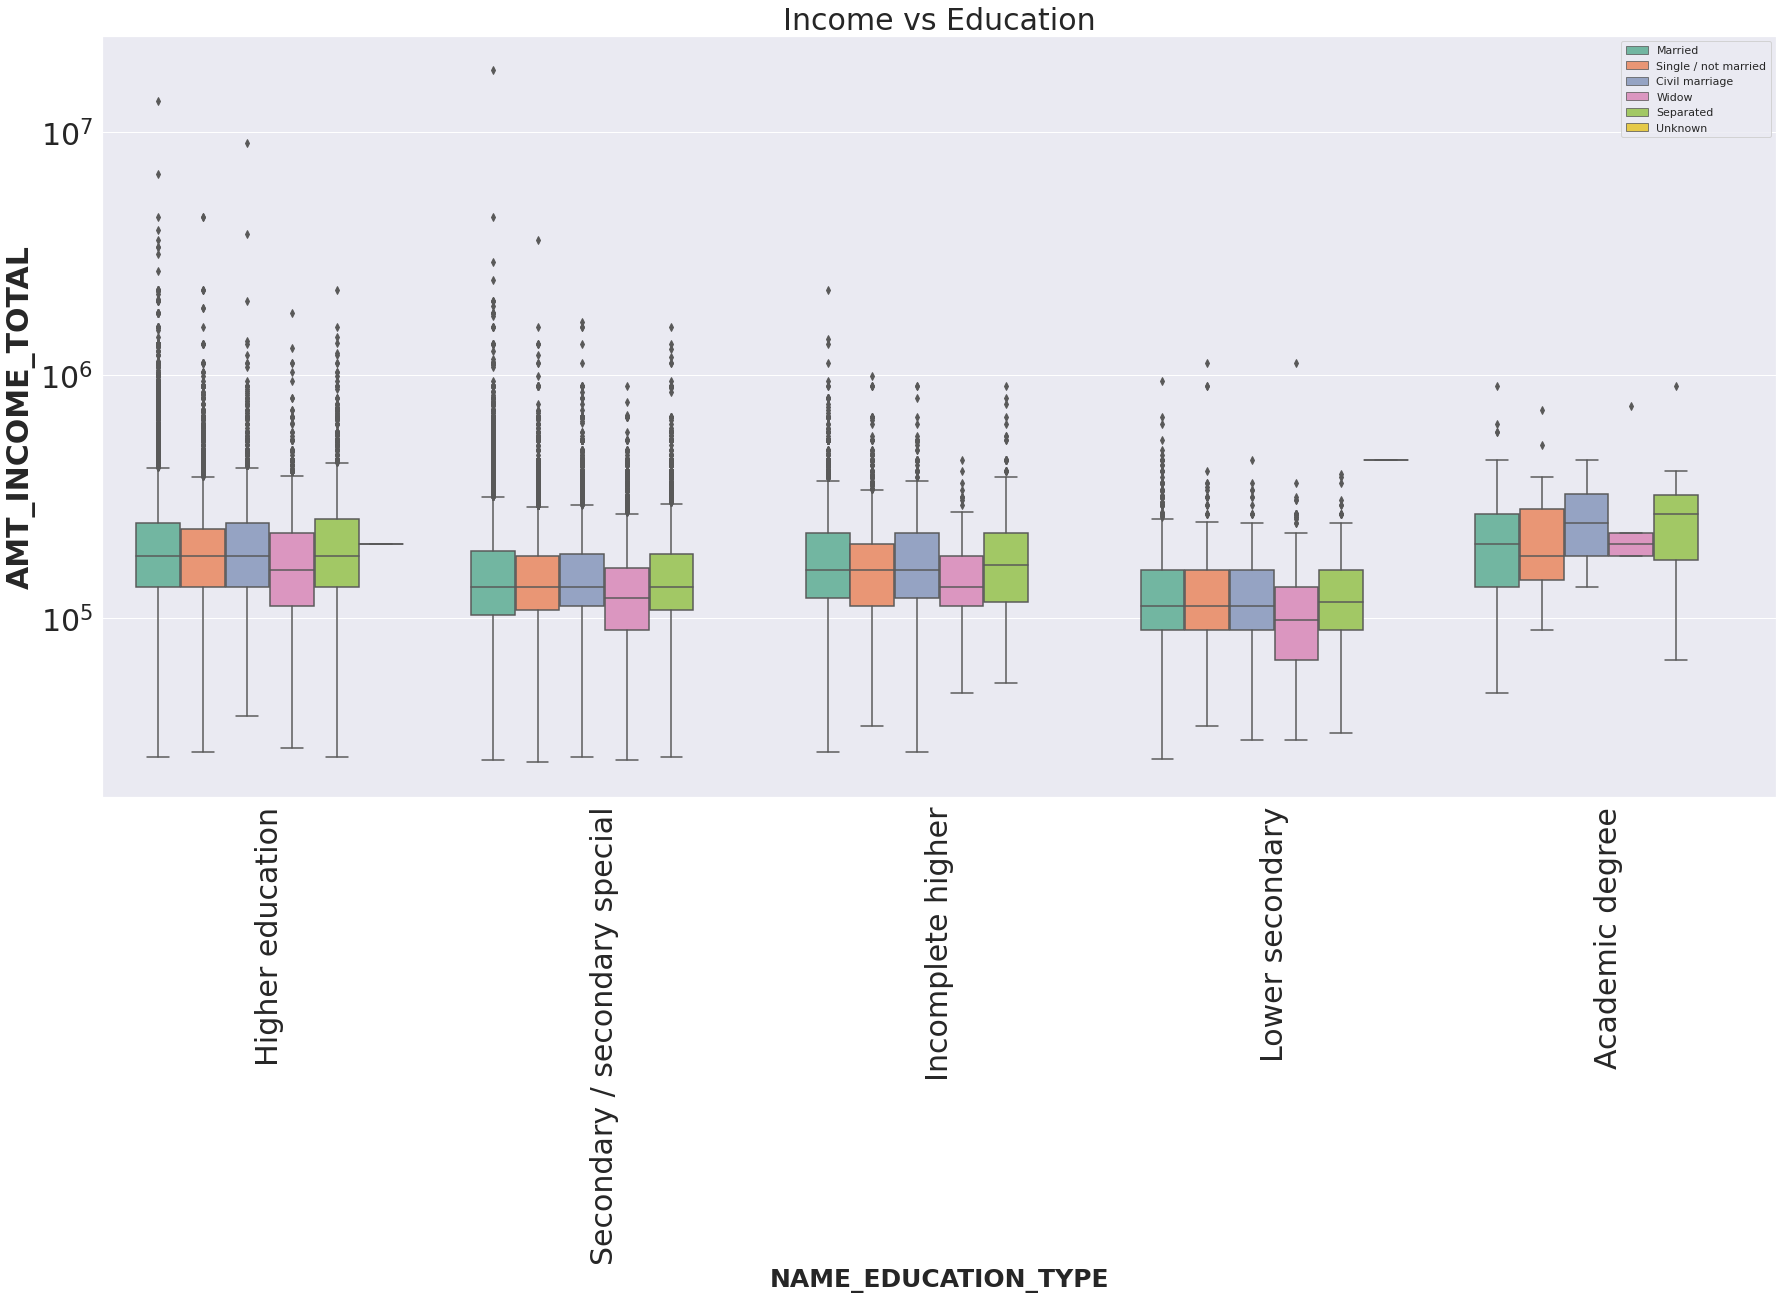

In [ ]:
plt.figure(figsize = (30,14))
plt.yscale('log')
plt.xticks(rotation = 90)

sns.boxplot(data = df_0, x = 'NAME_EDUCATION_TYPE', y = 'AMT_INCOME_TOTAL', hue = 'NAME_FAMILY_STATUS', orient = 'v', palette = 'Set2')

plt.legend(loc = 'upper right')
plt.title('Income vs Education', fontsize = 30)
plt.xlabel('NAME_EDUCATION_TYPE', fontsize = 25, fontweight = "bold")
plt.ylabel('AMT_INCOME_TOTAL', fontsize= 30, fontweight="bold") 
plt.xticks(rotation = 90, fontsize = 30)
plt.yticks(rotation = 360, fontsize = 30)
plt.show()


Income amount Vs Education Status Vs family status For target Non-Defaulter

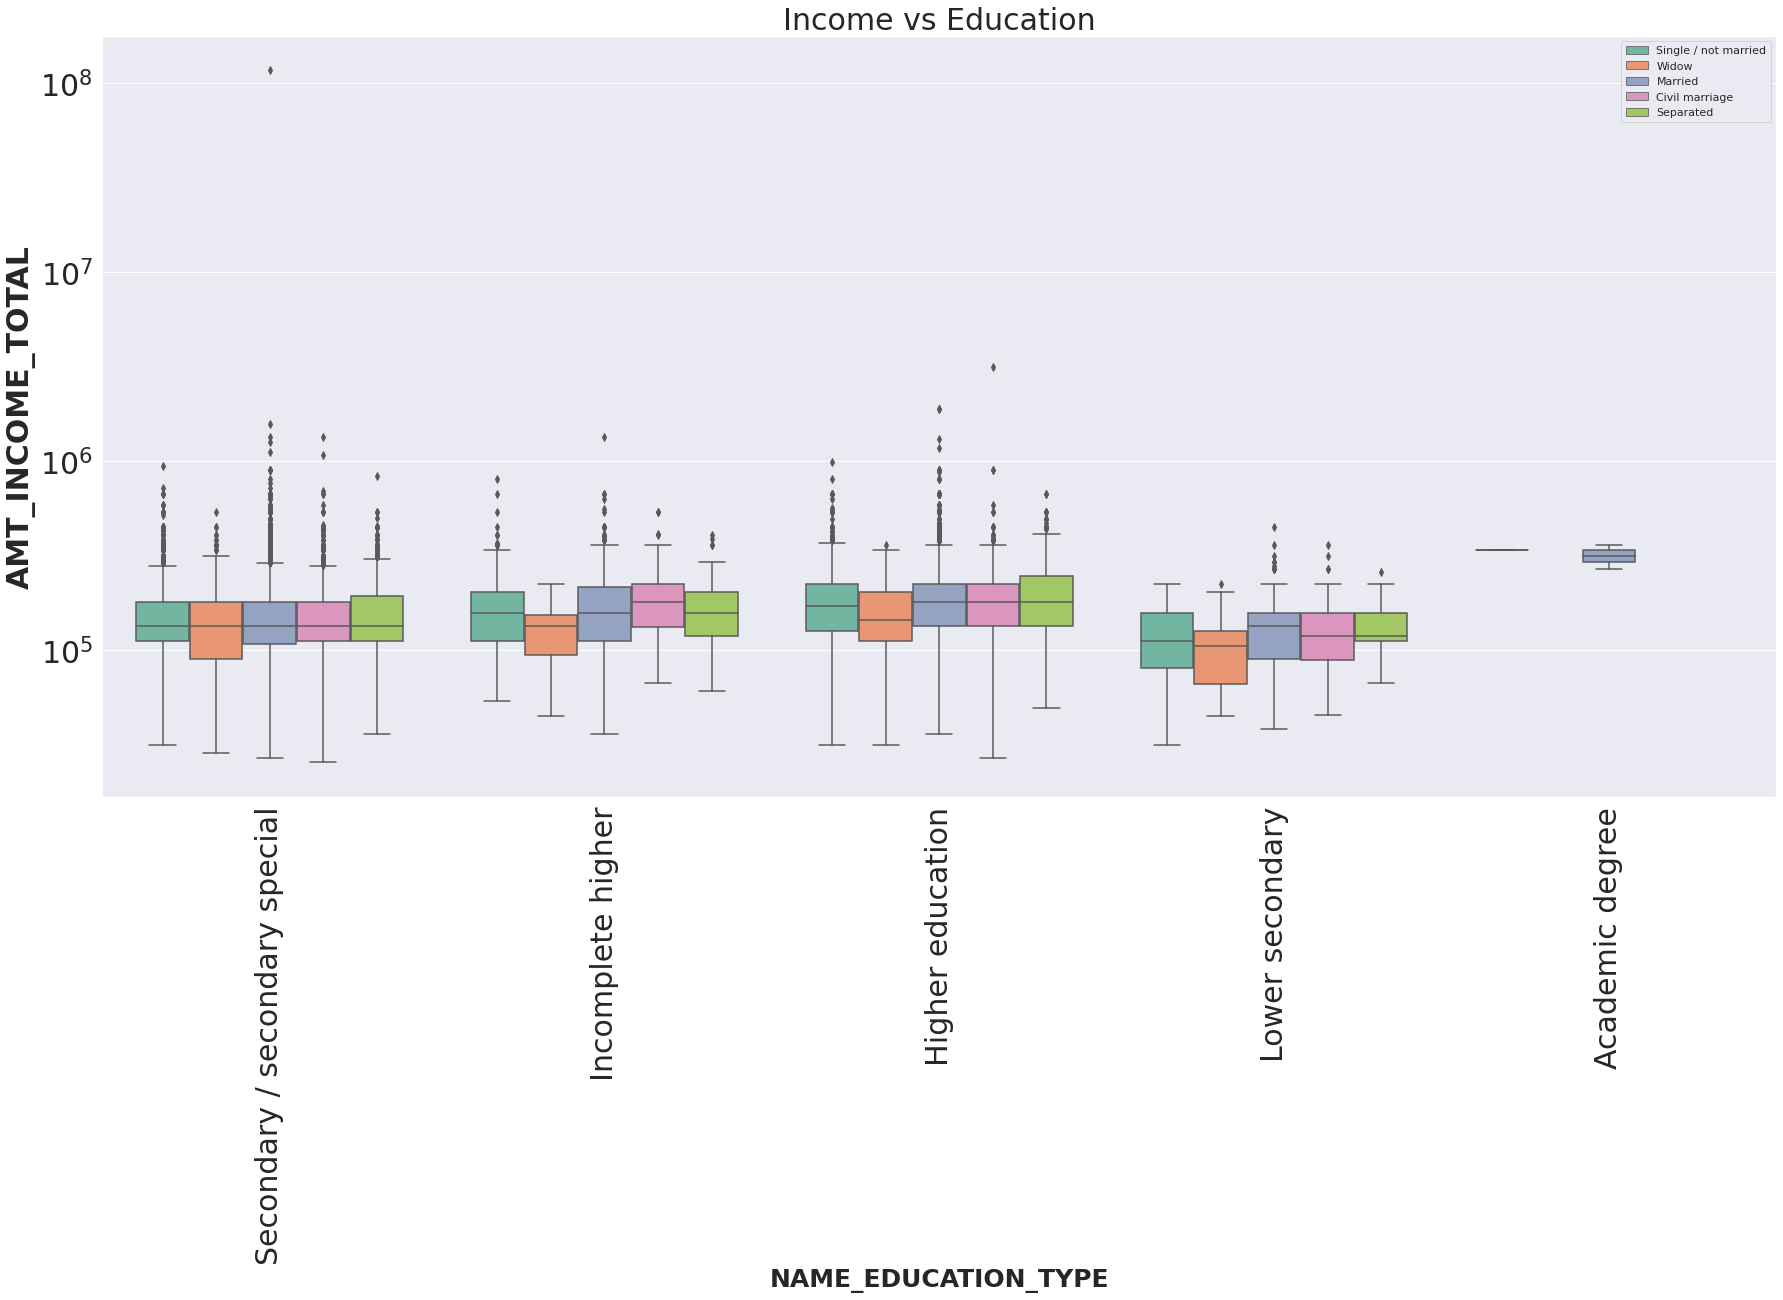

In [ ]:
plt.figure(figsize = (30,14))
plt.yscale('log')
plt.xticks(rotation = 90)

sns.boxplot(data = df_1, x = 'NAME_EDUCATION_TYPE', y = 'AMT_INCOME_TOTAL', hue = 'NAME_FAMILY_STATUS', orient = 'v', palette = 'Set2')

plt.legend(loc = 'upper right')
plt.title('Income vs Education', fontsize = 30)
plt.xlabel('NAME_EDUCATION_TYPE', fontsize = 25, fontweight = "bold")
plt.ylabel('AMT_INCOME_TOTAL', fontsize= 30, fontweight="bold") 
plt.xticks(rotation = 90, fontsize = 30)
plt.yticks(rotation = 360, fontsize = 30)
plt.show()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def bigplot(df, feature, title):
  temp = df[feature].value_counts()
  perc = df[[feature, 'TARGET']].groupby([feature],as_index = False).mean()
  perc.sort_values(by = 'TARGET', ascending = False, inplace = True)
  fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("count of " +title, "% of Loan Payment Diificulties Within Each Category"))

  fig.add_trace(go.Bar(x = temp.index, y = temp.values), row = 1, col = 1)
  fig.add_trace(go.Bar(x = perc[feature].to_list(), y = perc['TARGET'].tolist()), row = 1, col = 2)
  fig['layout']['xaxis']['title'] = feature
  fig['layout']['xaxis2']['title'] = feature
  fig['layout']['yaxis']['title'] = 'count'
  fig['layout']['yaxis2']['title'] = '% of Loan Payment Difficulties'
  fig.update_layout(height = 600, width = 1000, title_text = title, showlegend = False)
  fig.show()

Distribution of income range and the category with maximum loan-payment difficulties

In [ ]:
bigplot(df, 'AMT_INCOME_RANGE', 'INCOME_RANGE')

In [ ]:
##From the above plot we can clearly seen that people with income range 'LOW' have maximum percentage of loan payment difficulties

In [ ]:
##Distribution of income range and the Category with maximum loan-difficulties
bigplot(df, 'NAME_INCOME_TYPE', 'INCOME Type')

In [ ]:
##from the above plot we can clearly seen that clients with 'Maternity leave' income type are having maximum percentage of loan payment difficulties

In [ ]:
df.corr()

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                    1.000000 -0.002108     -0.001129   
TARGET                       -0.002108  1.000000      0.019187   
CNT_CHILDREN                 -0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL             -0.001820 -0.003982      0.012882   
AMT_CREDIT                   -0.000343 -0.030369      0.002145   
...                                ...       ...           ...   
AMT_REQ_CREDIT_BUREAU_DAY    -0.002193  0.002704     -0.000366   
AMT_REQ_CREDIT_BUREAU_WEEK    0.002099  0.000788     -0.002436   
AMT_REQ_CREDIT_BUREAU_MON     0.000485 -0.012462     -0.010808   
AMT_REQ_CREDIT_BUREAU_QRT     0.001025 -0.002022     -0.007836   
AMT_REQ_CREDIT_BUREAU_YEAR    0.004659  0.019930     -0.041550   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                         -0.001820   -0.000343    -0.000433   
TARGET                             -0.003982   -0.030369    -0.012817   
CNT_CHILDREN                        0.012882    0.002145     0.021374   
AMT_INCOME_TOTAL                    1.000000    0.156870     0.191657   
AMT_CREDIT                          0.156870    1.000000     0.770138   
...                                      ...         ...          ...   
AMT_REQ_CREDIT_BUREAU_DAY           0.002944    0.004238     0.002185   
AMT_REQ_CREDIT_BUREAU_WEEK          0.002387   -0.001275     0.013881   
AMT_REQ_CREDIT_BUREAU_MON           0.024700    0.054451     0.039148   
AMT_REQ_CREDIT_BUREAU_QRT           0.004859    0.015925     0.010124   
AMT_REQ_CREDIT_BUREAU_YEAR          0.011690   -0.048448    -0.011320   

                            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                        -0.000232                    0.000849   
TARGET                            -0.039645                   -0.037227   
CNT_CHILDREN                      -0.001827                   -0.025573   
AMT_INCOME_TOTAL                   0.159610                    0.074796   
AMT_CREDIT                         0.986968                    0.099738   
...                                     ...                         ...   
AMT_REQ_CREDIT_BUREAU_DAY          0.004677                    0.001399   
AMT_REQ_CREDIT_BUREAU_WEEK        -0.001007                   -0.002149   
AMT_REQ_CREDIT_BUREAU_MON          0.056422                    0.078607   
AMT_REQ_CREDIT_BUREAU_QRT          0.016432                   -0.001279   
AMT_REQ_CREDIT_BUREAU_YEAR        -0.050998                    0.001003   

                            DAYS_BIRTH  DAYS_EMPLOYED  ...  FLAG_DOCUMENT_18  \
SK_ID_CURR                    0.001471       0.001366  ...          0.000509   
TARGET                       -0.078237      -0.044932  ...         -0.007952   
CNT_CHILDREN                 -0.330897      -0.239818  ...          0.004031   
AMT_INCOME_TOTAL             -0.027248      -0.064223  ...          0.003130   
AMT_CREDIT                    0.055391      -0.066838  ...          0.034329   
...                                ...            ...  ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY    -0.002273       0.000472  ...          0.013281   
AMT_REQ_CREDIT_BUREAU_WEEK    0.001455       0.003072  ...         -0.004640   
AMT_REQ_CREDIT_BUREAU_MON    -0.001254      -0.034457  ...         -0.001565   
AMT_REQ_CREDIT_BUREAU_QRT     0.011769       0.015345  ...         -0.005125   
AMT_REQ_CREDIT_BUREAU_YEAR    0.071948       0.049988  ...         -0.047432   

                            FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
SK_ID_CURR                          0.000167          0.001073   
TARGET                             -0.001358          0.000215   
CNT_CHILDREN                        0.000864          0.000988   
AMT_INCOME_TOTAL                    0.002408          0.000242   
AMT_CREDIT                          0.021082          0.031023   
...                                      ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY         

In [ ]:
df.corr().abs()

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                    1.000000  0.002108      0.001129   
TARGET                        0.002108  1.000000      0.019187   
CNT_CHILDREN                  0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL              0.001820  0.003982      0.012882   
AMT_CREDIT                    0.000343  0.030369      0.002145   
...                                ...       ...           ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.002193  0.002704      0.000366   
AMT_REQ_CREDIT_BUREAU_WEEK    0.002099  0.000788      0.002436   
AMT_REQ_CREDIT_BUREAU_MON     0.000485  0.012462      0.010808   
AMT_REQ_CREDIT_BUREAU_QRT     0.001025  0.002022      0.007836   
AMT_REQ_CREDIT_BUREAU_YEAR    0.004659  0.019930      0.041550   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                          0.001820    0.000343     0.000433   
TARGET                              0.003982    0.030369     0.012817   
CNT_CHILDREN                        0.012882    0.002145     0.021374   
AMT_INCOME_TOTAL                    1.000000    0.156870     0.191657   
AMT_CREDIT                          0.156870    1.000000     0.770138   
...                                      ...         ...          ...   
AMT_REQ_CREDIT_BUREAU_DAY           0.002944    0.004238     0.002185   
AMT_REQ_CREDIT_BUREAU_WEEK          0.002387    0.001275     0.013881   
AMT_REQ_CREDIT_BUREAU_MON           0.024700    0.054451     0.039148   
AMT_REQ_CREDIT_BUREAU_QRT           0.004859    0.015925     0.010124   
AMT_REQ_CREDIT_BUREAU_YEAR          0.011690    0.048448     0.011320   

                            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                         0.000232                    0.000849   
TARGET                             0.039645                    0.037227   
CNT_CHILDREN                       0.001827                    0.025573   
AMT_INCOME_TOTAL                   0.159610                    0.074796   
AMT_CREDIT                         0.986968                    0.099738   
...                                     ...                         ...   
AMT_REQ_CREDIT_BUREAU_DAY          0.004677                    0.001399   
AMT_REQ_CREDIT_BUREAU_WEEK         0.001007                    0.002149   
AMT_REQ_CREDIT_BUREAU_MON          0.056422                    0.078607   
AMT_REQ_CREDIT_BUREAU_QRT          0.016432                    0.001279   
AMT_REQ_CREDIT_BUREAU_YEAR         0.050998                    0.001003   

                            DAYS_BIRTH  DAYS_EMPLOYED  ...  FLAG_DOCUMENT_18  \
SK_ID_CURR                    0.001471       0.001366  ...          0.000509   
TARGET                        0.078237       0.044932  ...          0.007952   
CNT_CHILDREN                  0.330897       0.239818  ...          0.004031   
AMT_INCOME_TOTAL              0.027248       0.064223  ...          0.003130   
AMT_CREDIT                    0.055391       0.066838  ...          0.034329   
...                                ...            ...  ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.002273       0.000472  ...          0.013281   
AMT_REQ_CREDIT_BUREAU_WEEK    0.001455       0.003072  ...          0.004640   
AMT_REQ_CREDIT_BUREAU_MON     0.001254       0.034457  ...          0.001565   
AMT_REQ_CREDIT_BUREAU_QRT     0.011769       0.015345  ...          0.005125   
AMT_REQ_CREDIT_BUREAU_YEAR    0.071948       0.049988  ...          0.047432   

                            FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
SK_ID_CURR                          0.000167          0.001073   
TARGET                              0.001358          0.000215   
CNT_CHILDREN                        0.000864          0.000988   
AMT_INCOME_TOTAL                    0.002408          0.000242   
AMT_CREDIT                          0.021082          0.031023   
...                                      ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY         

In [ ]:
df.corr().abs().unstack()

SK_ID_CURR                  SK_ID_CURR                    1.000000
                            TARGET                        0.002108
                            CNT_CHILDREN                  0.001129
                            AMT_INCOME_TOTAL              0.001820
                            AMT_CREDIT                    0.000343
                                                            ...   
AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_DAY     0.003355
                            AMT_REQ_CREDIT_BUREAU_WEEK    0.018917
                            AMT_REQ_CREDIT_BUREAU_MON     0.004975
                            AMT_REQ_CREDIT_BUREAU_QRT     0.076208
                            AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
Length: 4624, dtype: float64

In [ ]:
df.corr().abs().unstack().sort_values()

FLAG_DOCUMENT_12              FLAG_MOBIL                      0.000005
FLAG_MOBIL                    FLAG_DOCUMENT_12                0.000005
YEARS_BEGINEXPLUATATION_MODE  FLAG_DOCUMENT_4                 0.000005
FLAG_DOCUMENT_4               YEARS_BEGINEXPLUATATION_MODE    0.000005
                              YEARS_BEGINEXPLUATATION_AVG     0.000007
                                                                ...   
AMT_REQ_CREDIT_BUREAU_MON     FLAG_DOCUMENT_2                      NaN
AMT_REQ_CREDIT_BUREAU_QRT     FLAG_MOBIL                           NaN
                              FLAG_DOCUMENT_2                      NaN
AMT_REQ_CREDIT_BUREAU_YEAR    FLAG_MOBIL                           NaN
                              FLAG_DOCUMENT_2                      NaN
Length: 4624, dtype: float64

In [ ]:
correlation_0 = df.corr().abs().unstack().sort_values().dropna()
correlation_0

FLAG_DOCUMENT_12              FLAG_MOBIL                      0.000005
FLAG_MOBIL                    FLAG_DOCUMENT_12                0.000005
YEARS_BEGINEXPLUATATION_MODE  FLAG_DOCUMENT_4                 0.000005
FLAG_DOCUMENT_4               YEARS_BEGINEXPLUATATION_MODE    0.000005
                              YEARS_BEGINEXPLUATATION_AVG     0.000007
                                                                ...   
OBS_30_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        1.000000
TOTALAREA_MODE                TOTALAREA_MODE                  1.000000
FLOORSMAX_MEDI                FLOORSMAX_MEDI                  1.000000
FLAG_DOCUMENT_9               FLAG_DOCUMENT_9                 1.000000
AMT_REQ_CREDIT_BUREAU_YEAR    AMT_REQ_CREDIT_BUREAU_YEAR      1.000000
Length: 4592, dtype: float64

In [ ]:
correlation_0 = correlation_0[correlation_0 != 1.0]
correlation_0

FLAG_DOCUMENT_12              FLAG_MOBIL                      0.000005
FLAG_MOBIL                    FLAG_DOCUMENT_12                0.000005
YEARS_BEGINEXPLUATATION_MODE  FLAG_DOCUMENT_4                 0.000005
FLAG_DOCUMENT_4               YEARS_BEGINEXPLUATATION_MODE    0.000005
                              YEARS_BEGINEXPLUATATION_AVG     0.000007
                                                                ...   
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997034
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998490
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998490
FLAG_EMP_PHONE                DAYS_EMPLOYED                   0.999755
DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999755
Length: 4524, dtype: float64

In [ ]:
correlation_0.tail(20)

REGION_RATING_CLIENT          REGION_RATING_CLIENT_W_CITY     0.950842
REGION_RATING_CLIENT_W_CITY   REGION_RATING_CLIENT            0.950842
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI    0.963539
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE    0.963539
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.971893
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.971893
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.985689
FLOORSMAX_MODE                FLOORSMAX_AVG                   0.985689
AMT_GOODS_PRICE               AMT_CREDIT                      0.986968
AMT_CREDIT                    AMT_GOODS_PRICE                 0.986968
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.988237
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.988237
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.993825
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.993825
FLOORS

**Conclusion**

---



- Bank should target more on Male clients as their number are less than female.

- Bank should less focus on 'working' as they are having most number of unsuccessful payment

- Business descision is made to minimize the risk for giving loan to defaulter people

- Business decision made how to give loan to people who are credit worthy